# Se aplicará un algoritmos no supervisado Kmeans para agrupar los datos de la estadística utilizada. Se analizará con el resultado si las regiones son un buen separador de características considerando el análisis de ocurrencia de enfermedades 


In [77]:
#importamos librerías

import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [78]:
# IMPORTACIÓN DEL DATASET REDUCIDO LUEGO DEL PROCESAMIENTO DE COLUMNAS

df = pd.read_csv('friesgo_2018_reduc.csv',  sep=',', encoding='utf-8')

In [79]:
#muevo columnas de variables dependiendtes (enfermedades) al final

columnas_alFinal = [ 'dijeron_diabetes','veces_presion_alta', 'colesterol_alto']

df = df[[col for col in df if col not in columnas_alFinal] + columnas_alFinal]

#print (df.iloc[:,-3:]) 

In [80]:
#conjunto de datos sin las 3 columnas target y sin ID

X1 = df.iloc[:, 1:-3]  # Todas las columnas menos las últimas tres y la primera (id)
X1.shape

(25637, 97)

In [81]:
# Estandariza los datos
#scaler = StandardScaler()
#X = scaler.fit_transform(X1)

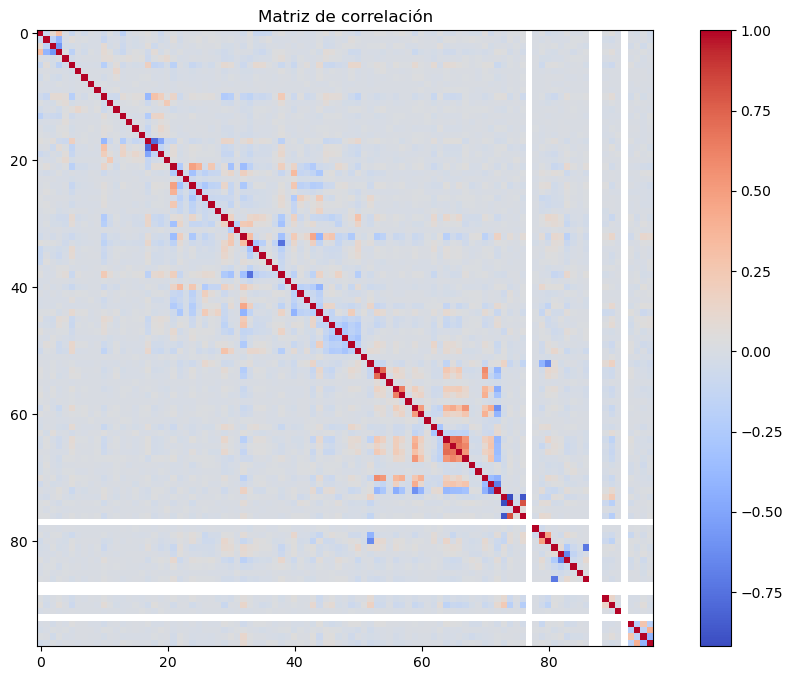

In [82]:
# 1.2 Análisis de correlación (opcional)
matriz_correlacion = pd.DataFrame(X1).corr()
plt.figure(figsize=(12, 8))
plt.imshow(matriz_correlacion, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.title("Matriz de correlación")
plt.show()

In [83]:
# Identificar pares de variables con alta correlación
threshold = 0.75  # Establecer un umbral para lo que consideras "alta" correlación
high_corr = np.where(np.abs(matriz_correlacion) > threshold)
high_corr_pairs = [(matriz_correlacion.index[x], matriz_correlacion.columns[y]) for x, y in zip(*high_corr) if x != y and x < y]

In [84]:
    
# Mostrar pares de variables altamente correlacionadas
for pair in high_corr_pairs:
    print(f"Variables altamente correlacionadas: {pair[0]} y {pair[1]} con coeficiente {matriz_correlacion.loc[pair[0], pair[1]]:.2f}")
    
    
    

Variables altamente correlacionadas: baño_1 y baño_2 con coeficiente -0.77
Variables altamente correlacionadas: alguna_vez_fumo y edad_fumo_primera_vez con coeficiente -0.92
Variables altamente correlacionadas: alguna_vez_fumo y actualmente_fuma_cigarrillos con coeficiente -0.87
Variables altamente correlacionadas: edad_fumo_primera_vez y actualmente_fuma_cigarrillos con coeficiente 0.81


In [85]:
# Lista de columnas a eliminar
#columns_to_drop = [18, 74, 76]
columns_to_drop = ['baño_2', 'edad_fumo_primera_vez', 'actualmente_fuma_cigarrillos']
#X_reduced= X1.drop(columns=columns_to_drop)
X= X1.drop(columns=columns_to_drop)

In [86]:
# Escalamos el dataset antes de correr PCA y aplicar DBscan
scaler = StandardScaler()
#X= scaler.fit_transform(X_reduced)

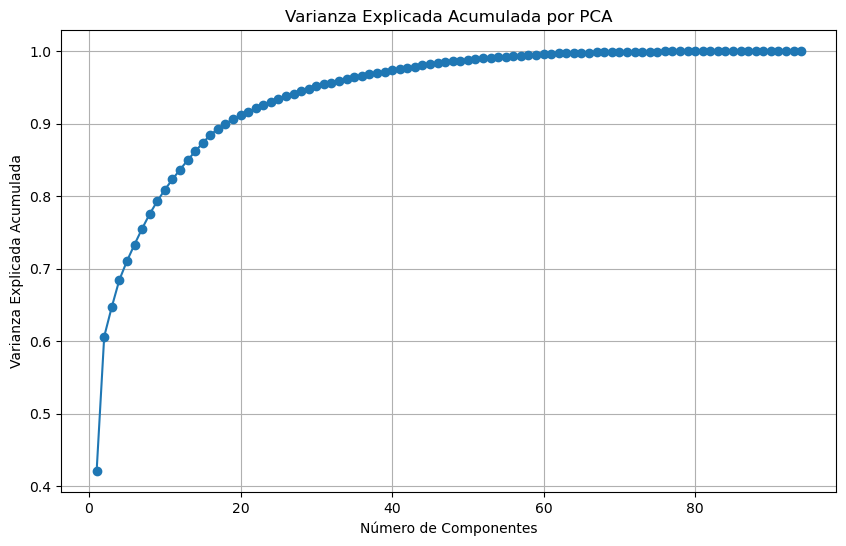

Para alcanzar al menos el 80% de la varianza explicada, se necesitan 10 componentes.


In [87]:
# Inicializar PCA
pca = PCA()

# Ajustar PCA a los datos estandarizados
X_pca = pca.fit_transform(X)


# Verificar la varianza explicada acumulada
varianza_explicada_acumulada = np.cumsum(pca.explained_variance_ratio_)


# Graficar la varianza explicada acumulada para decidir el número de componentes
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(varianza_explicada_acumulada) + 1), varianza_explicada_acumulada, marker='o')
plt.title('Varianza Explicada Acumulada por PCA')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada Acumulada')
plt.grid(True)
plt.show()

# Imprimir la varianza explicada acumulada con un límite de 80% o más
componentes_para_80 = np.argmax(varianza_explicada_acumulada >= 0.80) + 1
print(f"Para alcanzar al menos el 80% de la varianza explicada, se necesitan {componentes_para_80} componentes.")

In [88]:
# Reduccion de dimensionalidad

pca = PCA(n_components=10)  # Selecciona el número de componentes principales
X_pca = pca.fit_transform(X)

In [89]:

# Se añade la información de los componentes principales al DataFrame original
#pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 
#                                      'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19', 
#                                      'PC20', 'PC21', 'PC22', 'PC23', 'PC24', 'PC25', 'PC26', 'PC27', 'PC28', 'PC29', 
#                                      'PC30', 'PC31', 'PC32', 'PC33', 'PC34', 'PC35', 'PC36', 'PC37', 'PC38', 'PC39', 
#                                      'PC40', 'PC41', 'PC42', 'PC43', 'PC44', 'PC45', 'PC46', 'PC47', 'PC48', 'PC49', 
#                                      'PC50', 'PC51', 'PC52', 'PC53'])

pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'])

df_merged = pd.merge(df, pca_df, right_index=True, left_index=True)

In [90]:
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-0.339842,-0.818904,3.055113,-2.497430,3.042313,-1.371803,0.699077,-0.600625,0.109045,-0.236682
1,-0.315333,0.204680,1.014538,-2.503498,0.705698,-0.229323,2.211631,-1.581616,1.241784,0.696234
2,-0.314535,0.236389,0.494394,-2.445137,-1.013573,0.418061,0.826790,-0.235161,2.039111,-0.225663
3,-0.302407,0.238704,-2.733891,-1.900635,0.344876,0.476244,2.041571,-0.084332,1.301329,1.522067
4,-0.305793,0.213043,0.655374,-2.495823,0.059983,-0.636655,-0.966621,0.057978,0.872048,-0.860095
...,...,...,...,...,...,...,...,...,...,...
25632,-0.273906,0.229574,0.128768,2.928992,-1.854771,1.586105,0.187919,-0.118856,-2.648321,2.271709
25633,-0.295567,-0.847632,-0.627739,2.801897,0.706466,-1.915178,-0.477428,0.190514,-0.049455,0.777772
25634,-0.282255,0.151602,1.886631,2.463814,-2.753096,-1.464383,-0.665482,-1.693081,-1.332659,1.836930
25635,-0.290075,0.177770,2.168139,2.572354,-2.780035,-0.128181,-1.687716,-1.936577,0.501366,3.125634


In [91]:
# Imprimir la varianza explicada por cada componente principal
#print('Varianza explicada')
#for i in range(53):
#    print('PC{}: {}'.format(i+1, pca.explained_variance_ratio_[i]))

In [92]:

# Calcular la varianza acumulada
varianza_acumulada = np.cumsum(pca.explained_variance_ratio_)
print(varianza_acumulada)

[0.4207581  0.60652444 0.6473121  0.68460698 0.71057002 0.73340709
 0.75525762 0.77547548 0.79312151 0.80894116]


### Se observa que la suma acumulada de los primeros 53 componentes explica mas del 80% de los datos
    

# Analisis de las cargas variables que afectan cada componente en mayor medida

In [93]:
# Cargas de los componentes principales

#loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(53)], index=X_reduced.columns)
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(10)], index=X_reduced.columns)

In [94]:

# Filtrar las cargas que tengan una magnitud mayor al umbral (0.1 para un 10%)
threshold = 0.3
loadings_filtered = loadings[(loadings.abs() >= threshold).any(axis=1)]

# Mostrar las cargas filtradas
print(loadings_filtered)

                                         PC1       PC2       PC3       PC4  \
region                              0.003971 -0.004955  0.087417  0.972672   
cant_componentes                    0.000148 -0.002119  0.075487  0.023364   
ingresos                           -0.001203  0.000158  0.084367 -0.031566   
edad                                0.001106 -0.003312 -0.205844 -0.038685   
af_intensa_veces_por_semana        -0.001689  0.002674  0.336154  0.025016   
af_intensa_min_totales_por_semana  -0.001858  0.001769  0.303498  0.025972   
af_moderada_veces_por_semana       -0.001636 -0.000944  0.330288 -0.003030   
af_moderada_min_totales_por_semana -0.001370 -0.002193  0.283232  0.024171   
caminata_veces_por_semana          -0.001796 -0.002087  0.362940 -0.108068   
tiempo_sentado_min_por_dia          0.000587 -0.001122 -0.054389 -0.030444   
tiempo_sentado_min_por_dia_nsnc     0.003222  0.006550 -0.106717  0.049855   
No_sabe_edad_fumo_primera_vez       0.999752 -0.019814  0.004506

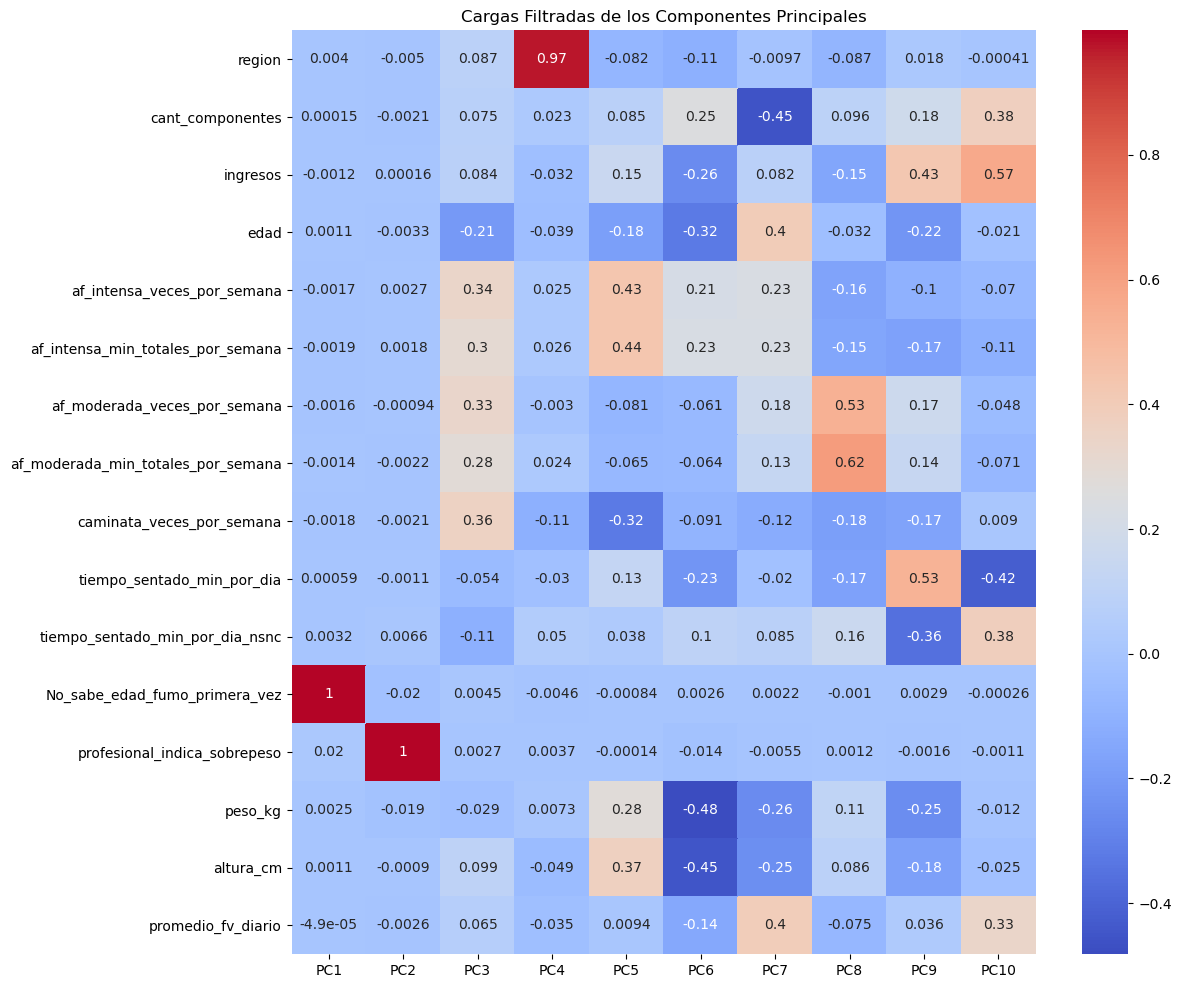

In [95]:
columnas_primeras = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10']

plt.figure(figsize=(12, 12))
sns.heatmap(loadings_filtered[columnas_primeras], annot=True, cmap='coolwarm')
plt.title('Cargas Filtradas de los Componentes Principales')
plt.show()

# Aplicamos método Elbow para determinar cantidad óptima de clusters

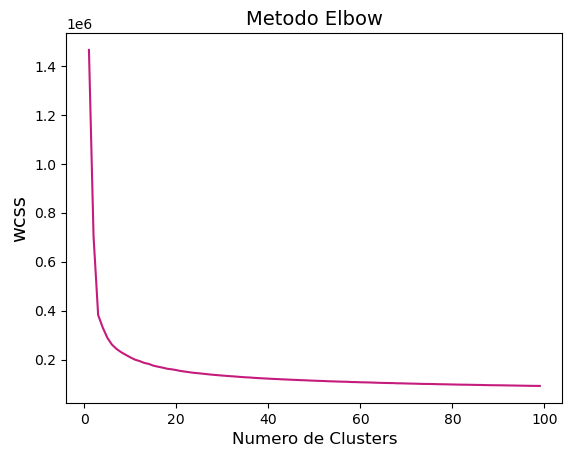

In [96]:
wcss = []
for i in range(1, 100):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(pca_df)
    wcss.append(km.inertia_)
plt.plot(range(1, 100), wcss, c="#c51b7d")
#plt.gca().spines["top"].set_visible(False)
#plt.gca().spines["right"].set_visible(False)
plt.title('Metodo Elbow', size=14)
plt.xlabel('Numero de Clusters', size=12)
plt.ylabel('wcss', size=14)
plt.show()


# El codo se encuentra en 10 clusters aproximadamente

# Análisis de Silouette

In [99]:
from sklearn.metrics import silhouette_score

In [104]:

sil = []
kmax = 10

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters=k, n_init=10).fit(pca_df)
    labels = kmeans.labels_
    sil.append(silhouette_score(pca_df, labels, metric='euclidean'))

    
print("fin silouette")    
    
# Análisis de Silueta
#for n in range(2, 11):
#    kmeans = KMeans(n_clusters=n, random_state=0, n_init=10)
#    labels = kmeans.fit_predict(X_pca)
#    silhouette_avg = silhouette_score(X_pca, labels)
#    print(f'Número de clusters: {n}, Score de Silueta: {silhouette_avg}')

fin silouette


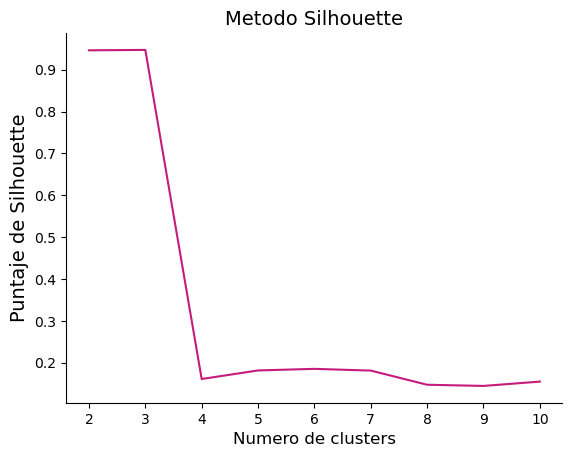

In [105]:
plt.plot(range(2,11),sil, c="#c51b7d")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.title('Metodo Silhouette', size=14)
plt.xlabel('Numero de clusters', size=12)
plt.ylabel('Puntaje de Silhouette', size=14)
plt.show()

In [106]:
# Análisis de Silueta
for n in range(2, 11):
    kmeans = KMeans(n_clusters=n, random_state=0, n_init=10)
    labels = kmeans.fit_predict(X_pca)
    silhouette_avg = silhouette_score(X_pca, labels)
    print(f'Número de clusters: {n}, Score de Silueta: {silhouette_avg}')

Número de clusters: 2, Score de Silueta: 0.9464855964673222
Número de clusters: 3, Score de Silueta: 0.9474113572740644
Número de clusters: 4, Score de Silueta: 0.16080477361884948
Número de clusters: 5, Score de Silueta: 0.18131036955305516
Número de clusters: 6, Score de Silueta: 0.18513291607485446
Número de clusters: 7, Score de Silueta: 0.18075941425943287
Número de clusters: 8, Score de Silueta: 0.14710768815299846
Número de clusters: 9, Score de Silueta: 0.1443662558402269
Número de clusters: 10, Score de Silueta: 0.15480266536050086


### De acuerdo a los resultados de silueta la mejor oción serían 2 o 3  clusters. Evaluaremos ambas agrupaciones

ninguno de las formas de agrupamiento resulta muy buena ya que todos los niveles están muy cerca de 0, cuando idealmente deberían estar cerca de 1. utilizaremos el criterio obtenido mediante el método elbow agrupando en 3 clusters

In [139]:
# Ahora aplica KMeans a los datos reducidos agrupando en 3 clusters

kmeans = KMeans(n_clusters=5, random_state=0, n_init=10)
kmeans.fit(pca_df)

KMeans(n_clusters=5, n_init=10, random_state=0)

In [140]:

# Agrega los labels al DataFrame original
pca_df['Cluster'] = kmeans.labels_

In [141]:
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Cluster
0,-0.339842,-0.818904,3.055113,-2.497430,3.042313,-1.371803,0.699077,-0.600625,0.109045,-0.236682,2
1,-0.315333,0.204680,1.014538,-2.503498,0.705698,-0.229323,2.211631,-1.581616,1.241784,0.696234,2
2,-0.314535,0.236389,0.494394,-2.445137,-1.013573,0.418061,0.826790,-0.235161,2.039111,-0.225663,2
3,-0.302407,0.238704,-2.733891,-1.900635,0.344876,0.476244,2.041571,-0.084332,1.301329,1.522067,0
4,-0.305793,0.213043,0.655374,-2.495823,0.059983,-0.636655,-0.966621,0.057978,0.872048,-0.860095,2
...,...,...,...,...,...,...,...,...,...,...,...
25632,-0.273906,0.229574,0.128768,2.928992,-1.854771,1.586105,0.187919,-0.118856,-2.648321,2.271709,4
25633,-0.295567,-0.847632,-0.627739,2.801897,0.706466,-1.915178,-0.477428,0.190514,-0.049455,0.777772,4
25634,-0.282255,0.151602,1.886631,2.463814,-2.753096,-1.464383,-0.665482,-1.693081,-1.332659,1.836930,4
25635,-0.290075,0.177770,2.168139,2.572354,-2.780035,-0.128181,-1.687716,-1.936577,0.501366,3.125634,4


In [142]:
# Calcular la varianza dentro de cada cluster para cada componente principal
variance_within_cluster = pca_df.groupby('Cluster').var()

print(variance_within_cluster)

              PC1         PC2       PC3       PC4       PC5       PC6  \
Cluster                                                                 
0        0.000159    0.242404  0.223201  2.205658  0.589452  1.469807   
1        0.049178  121.594784  3.023250  2.353753  1.339378  1.588743   
2        0.000125    0.220536  1.353988  0.581511  1.896661  1.605788   
3        0.000247    0.000540  3.007804  2.631667  1.166310  1.298683   
4        0.000132    0.225950  1.768914  0.717242  1.921743  1.594382   

              PC7       PC8       PC9      PC10  
Cluster                                          
0        1.347260  0.275029  1.561421  1.541866  
1        1.373715  1.116755  1.910175  1.535281  
2        1.597235  1.350356  1.165963  1.021995  
3        1.391547  0.650064  2.460478  1.893516  
4        1.546955  2.005121  1.172426  1.003492  


In [143]:
#calculamos cuantos datos tengo en cada cluster para ver la distribucion

# Contar la cantidad de datos en cada cluster
cluster_counts = pca_df['Cluster'].value_counts()

# Imprimir el número de datos en cada cluster
print(cluster_counts)

2    13133
4     7534
0     4858
1       78
3       34
Name: Cluster, dtype: int64


### Se observa que el cluster 0 tienen 11008  datos, el cluster 1 tienen casi 10000 y el cluster 2 4750

In [144]:
from mpl_toolkits.mplot3d import Axes3D  # Necesario para crear gráficos 3D

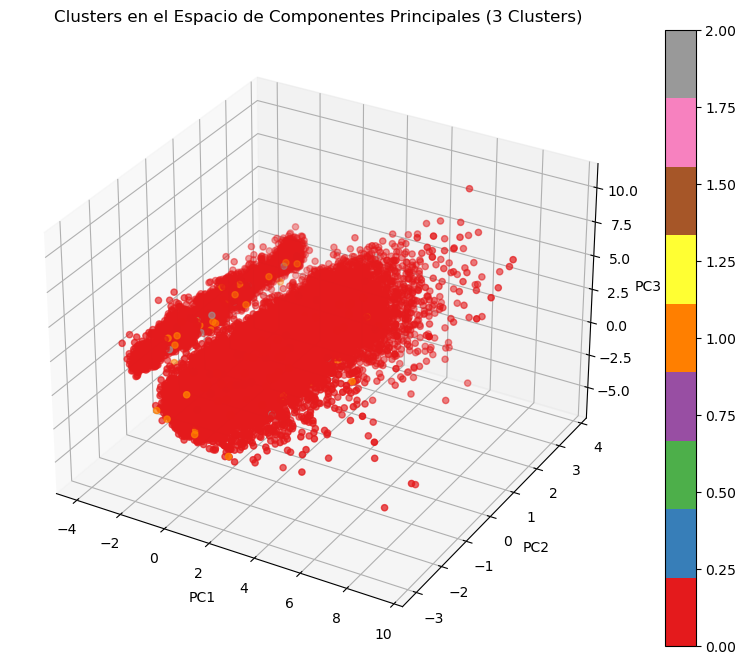

In [138]:

# Crear una figura 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Visualizar los clusters en un gráfico 3D
sc = ax.scatter(pca_df['PC3'], pca_df['PC4'], pca_df['PC5'], c=pca_df['Cluster'], cmap='Set1')

# Agregar etiquetas a los ejes y título
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('Clusters en el Espacio de Componentes Principales (3 Clusters)')

# Agregar una barra de color para mostrar los clusters
plt.colorbar(sc)

# Mostrar la gráfica
plt.show()

## Se analizará la relación entre los clusters generados  y las regiones 

In [133]:
#vemso la distribucion de cada cluster en función de la region

# Ver la distribución de las regiones dentro de cada cluster
cluster_region_distribution = pd.crosstab(pca_df['Cluster'], df['region'])
print(cluster_region_distribution)

region      1     2     3     4     5     6
Cluster                                    
0        3225  8258  4630  3495  2347  3570
1           6    14    21    21     2    14
2           6    12     6     3     4     3


In [134]:
region_dict = {
    1: 'Metropolitana',
    2: 'Pampeana',
    3: 'Noroeste',
    4: 'Noreste',
    5: 'Cuyo',
    6: 'Patagónica'
}


In [135]:
#agregamos los nombres de las regiones apra identificar mejor

cluster_region_distribution = cluster_region_distribution.rename(columns=region_dict)
print(cluster_region_distribution)

region   Metropolitana  Pampeana  Noroeste  Noreste  Cuyo  Patagónica
Cluster                                                              
0                 3225      8258      4630     3495  2347        3570
1                    6        14        21       21     2          14
2                    6        12         6        3     4           3


### Para una mejor interpretación encontraremos el porcentaje de datos cada región en cada cluster  

In [136]:
    #Calcula el total de datos en cada region
#total_por_cluster = cluster_region_distribution.sum(axis=1)
#print(total_por_cluster)

total_por_region =  cluster_region_distribution.sum(axis=0)
print(total_por_region)

region
Metropolitana    3237
Pampeana         8284
Noroeste         4657
Noreste          3519
Cuyo             2353
Patagónica       3587
dtype: int64


In [137]:

# Calcula el porcentaje de datos por región en cada cluster
#cluster_region_percentage = cluster_region_distribution.div(total_por_cluster, axis=0) * 100

region_percentage = cluster_region_distribution.div(total_por_region, axis=1) * 100
print(region_percentage)


region   Metropolitana   Pampeana   Noroeste    Noreste       Cuyo  Patagónica
Cluster                                                                       
0            99.629286  99.686142  99.420228  99.317988  99.745006   99.526066
1             0.185357   0.169000   0.450934   0.596760   0.084998    0.390298
2             0.185357   0.144858   0.128838   0.085251   0.169996    0.083635


## Conclusión
### Se observa que en función de la región los clusters realmente no establecen una diferencia importante. Se probará con otro tipo de algoritmo